After [Topological Data Analysis of Financial Time Series:Landscapes of Crashes](https://arxiv.org/pdf/1703.04385.pdf) : using tools for persistent homology (in particular persistence landscapes, a way to embed persistence diagrams in a Banach space) to create robust predictors of crash or regime transition times.

Example on synthetic data : stochastic Heron map with chaotic bifurcation.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from persistence_crash_detection import *

In [2]:
n = 500

LENGTH_MAX = 0.3
RESOLUTION = 250
NBLD = 3

p = 2

In [3]:
b_list = [0.27, 0.28, 0.29, 0.30]
data_all = np.array([random_henon(n, b, 0.2, T=1.4) for b in b_list])
data = data_all[:, 0, :]
ts = data_all[:, 2, :][0]

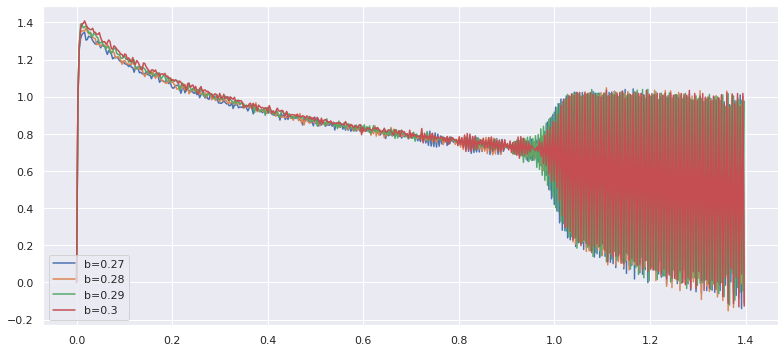

In [4]:
fig, ax = plt.subplots(figsize=(11, 5), nrows=1, ncols=1)

for i, x in enumerate(data):
    ax.plot(ts, x.T, label='b={}'.format(b_list[i]))

ax.legend(loc='lower left')
plt.tight_layout()
plt.show()

In [5]:
norm_series = np.empty(n)

for t in range(n):
    L, x = landscape_at_t(data, 
                          t, 
                          dim=0,
                          nbld=NBLD, 
                          resolution=RESOLUTION, 
                          length_max=LENGTH_MAX,
                         )

    norm_series[t] = np.linalg.norm(trapz(L), ord=p)

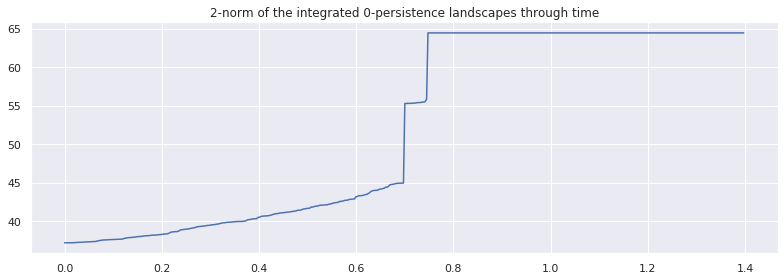

In [6]:
fig, ax = plt.subplots(figsize=(11, 4), nrows=1, ncols=1)

ax.plot(ts, norm_series)
ax.set_title('{}-norm of the integrated 0-persistence landscapes through time'.format(p))
plt.tight_layout()
plt.show()